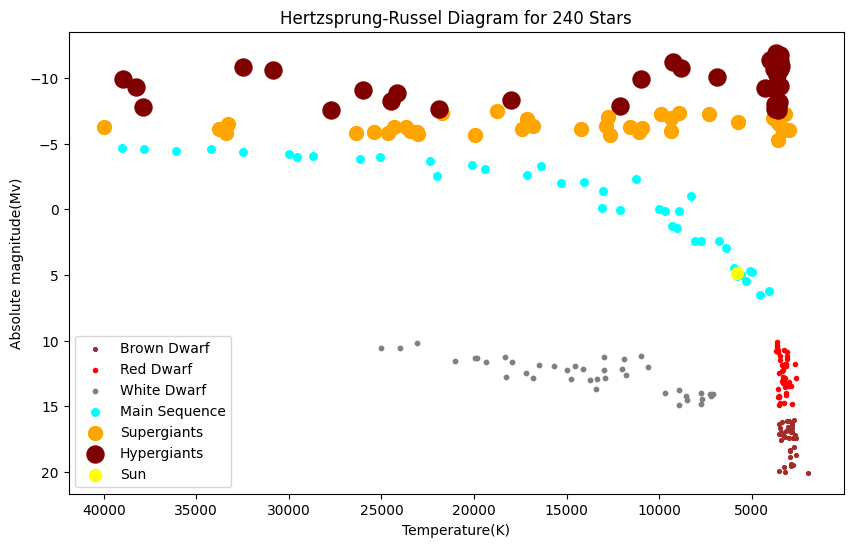

In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')

star_df.head()
folder_name = 'star_plots'
base_dir = f'D:\\Python\\da-projects\\astronomical-data\\{folder_name}\\'

star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values  #creates a numpy list of all values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types ={ #creating a dict for each star type and their properties
  0 : {'label':'Brown Dwarf', 'color':'brown', 'size':30, 'marker':'.'},
  1 : {'label':'Red Dwarf', 'color':'red', 'size':35, 'marker':'.'},
  2 : {'label':'White Dwarf', 'color':'grey', 'size':40, 'marker':'.'},
  3 : {'label':'Main Sequence', 'color':'cyan', 'size':30, 'marker':'o'},
  4 : {'label':'Supergiants', 'color':'orange', 'size':100, 'marker':'o'},
  5 : {'label':'Hypergiants', 'color':'maroon', 'size':150, 'marker':'o'}
}

axes = []
labels = set()
plt.figure(figsize=(10,6))
for i in range(len(star_type)):
  properties = star_types[star_type[i]]
  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])
    axes.append(ax)
    labels.add(properties['label'])
  else:
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])
#Adding sun data
ax_sun = plt.scatter(5778, 4.83, s = 75, c = 'yellow', label = 'Sun')
axes.append(ax_sun)
labels.add('Sun')

plt.title(f'Hertzsprung-Russel Diagram for {len(star_type)} Stars')
plt.ylabel('Absolute magnitude(Mv)')
plt.xlabel('Temperature(K)')
plt.legend(handles = axes)
plt.gca().invert_xaxis() #gca: get current axis
plt.gca().invert_yaxis()
plt.savefig(base_dir+'hr-diagram.png')
plt.show()


